In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [45]:
#leer imagenes
#primer problema
image = cv2.imread('img/Problema1.jpg')
#segundo problema
second_image = cv2.imread('img/Problema2.jpg')

In [46]:
#********** PRIMER PROBLEMA ********** 
#Convertir la imagen a escala de grises
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [47]:
#Rotacion de la imagen original 37 grados.
height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width / 1.5, height / 1.5), 37, 1)
dst_image = cv2.warpAffine(image, M, (width, height))

cv2.circle(dst_image, (round(width / 1.5), round(height / 1.5)),
5, (255, 0, 0), -1)

plt.show()

In [48]:
def show_with_matplotlib_problema1(st01, st02, st03):
    figure, axis = plt.subplots(3,2, figsize=(10, 15))

        #imagen oringal
    plt.subplot(3,2,1)
    plt.title("Original")
    plt.imshow(st01[:,:,::-1])
    plt.axis('off')

    #Histograma original
    plt.subplot(3,2,2)
    plt.title("Histograma RGB")

    colors = ('b', 'g','r')

    for i, c in enumerate(colors):
        histRGB = cv2.calcHist([st01], [i], None, [256], [0, 256])
        plt.plot(histRGB, color = c)
        plt.title('Histograma RGB')
        plt.xlim([0,256])

    plt.subplot(3,2,3)
    plt.title("Escalas de grises")
    plt.imshow(st02, cmap="gray")
    plt.axis('off')

    plt.subplot(3,2,4)
    plt.title("Histograma escala de grises")
    histGray = cv2.calcHist(st02, [0], None, [256], [0,256])
    plt.plot(histGray, color='gray')

    #Rotacion
    plt.subplot(3,2,5)
    plt.title("Rotacion")
    plt.imshow(st03[:,:,::-1])
    plt.axis('off')

    #Rotacion Histograma
    plt.subplot(3,2,6)
    plt.title("Histograma Rotacion Canal Azul")
    blue_hist = cv2.calcHist([st03], [2], None, [256], [0, 255])
    plt.plot(blue_hist, color='b')
    plt.xlim([0, 255])

    plt.show()


In [49]:
#********** Segundo PROBLEMA ********** 
#Convertir la imagen a escala de grises
image_gray_2 = cv2.cvtColor(second_image,cv2.COLOR_BGR2GRAY)

In [50]:
def show_with_matplotlib_problema2(st01,st02, st03, st04, st05, st06, st07, st08):
    figure, axis = plt.subplots(2,4, figsize=(15, 6))
    plt.suptitle("Técnicas de Smoothing", fontsize=14, fontweight='bold')
    #imagen oringal
    plt.subplot(2,4,1)
    plt.title("Original")
    plt.imshow(st01[:,:,::-1])
    plt.axis('off')

   #25x25
    plt.subplot(2,4,2)
    plt.title("GaussianBlur 25x25")
    plt.imshow(st02[:,:,::-1])
    plt.axis('off')

     #29x29
    plt.subplot(2,4,3)
    plt.title("GaussianBlur 29x29")
    plt.imshow(st03[:,:,::-1])
    plt.axis('off')

     #37x37
    plt.subplot(2,4,4)
    plt.title("GaussianBlur 37x37")
    plt.imshow(st04[:,:,::-1])
    plt.axis('off')

    #gray
    plt.subplot(2,4,5)
    plt.title("Escala de grises")
    plt.imshow(st05, cmap="gray")
    plt.axis('off')

    #gray_bilateral
    plt.subplot(2,4,6)
    plt.title("Bilateral Gray")
    plt.imshow(st06, cmap="gray")
    plt.axis('off')

    #gray_median
    plt.subplot(2,4,7)
    plt.title("Median Gray")
    plt.imshow(st07, cmap="gray")
    plt.axis('off')

    #gray_box
    plt.subplot(2,4,8)
    plt.title("Box Gray")
    plt.imshow(st08, cmap="gray")
    plt.axis('off')

    plt.show()

In [51]:
def putText(img, title, org, fontFace, fontScale, color, thickness):
    cv2.putText(img=img,
text=title,
org=org,
fontFace=fontFace,
fontScale=fontScale,
color=color,
thickness=thickness)

In [52]:
# Filtro Gaussiano
smooth_image_gb_25 = cv2.GaussianBlur(second_image, (25,25), 0)
smooth_image_gb_29 = cv2.GaussianBlur(second_image, (29,29), 0)
smooth_image_gb_37 = cv2.GaussianBlur(second_image, (37,37),0)

#Texto
putText(img=second_image, title="Original", org=(20,100), fontFace=3, fontScale=4, color=(6,214,160), thickness=12)
putText(img=smooth_image_gb_25 , title="GaussianBlur 25x25", org=(20,100), fontFace=3, fontScale=4, color=(6,214,160), thickness=12)
putText(img=smooth_image_gb_29 , title="GaussianBlur 29x29", org=(20,100), fontFace=3, fontScale=4, color=(6,214,160), thickness=12)
putText(img=smooth_image_gb_37 , title="GaussianBlur 37x37", org=(20,100), fontFace=3, fontScale=4, color=(6,214,160), thickness=12)


In [53]:
#Escala de grises
image_gray_2 = cv2.cvtColor(second_image,cv2.COLOR_BGR2GRAY)

#Filtros
bilateral_gray = cv2.bilateralFilter(image_gray_2, 39, 200, 200)
median_gray = cv2.medianBlur(image_gray_2,27)
box_gray = cv2.boxFilter(image_gray_2, -1, (30, 30), normalize=True)

#Texto
putText(img=image_gray_2, title="Escala de grises", org=(20,100), fontFace=3, fontScale=4, color=(255,0,0), thickness=12)
putText(img=bilateral_gray, title="Bilateral Gray", org=(20,100), fontFace=3, fontScale=4, color=(255,0,0), thickness=12)
putText(img=median_gray, title="Median Gray", org=(20,100), fontFace=3, fontScale=4, color=(255,0,0), thickness=12)
putText(img=box_gray, title="Box Gray", org=(20,100), fontFace=3, fontScale=4, color=(255,0,0), thickness=12)

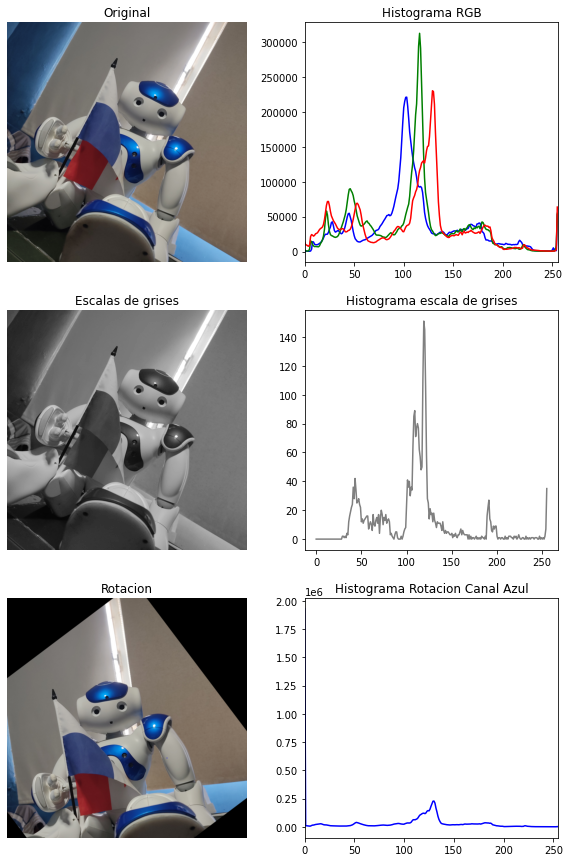

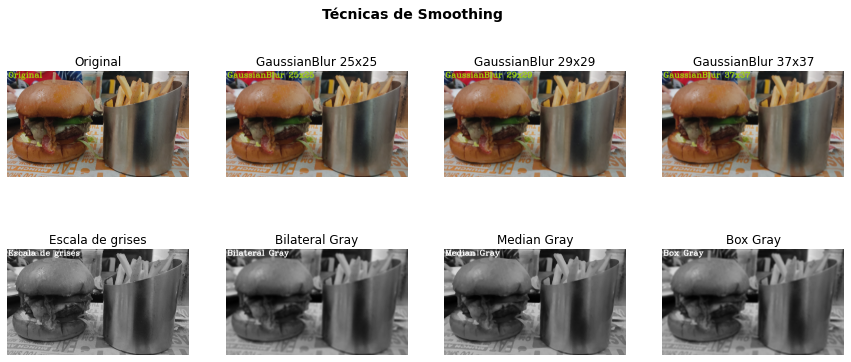

In [55]:
#Mostrar Resultados
show_with_matplotlib_problema1(image, image_gray, dst_image)
show_with_matplotlib_problema2(second_image,smooth_image_gb_25, smooth_image_gb_29, smooth_image_gb_37,image_gray_2, bilateral_gray, median_gray, box_gray)